## Importing Required Modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Data, EDA and Preprocessing

In [ ]:
df=pd.read_csv("/content/cirrhosis.csv")

In [ ]:
df.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [ ]:
df.shape

(418, 20)

In [ ]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [ ]:
df.tail()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0
417,418,976,C,NaN,19358,F,NaN,NaN,NaN,N,0.7,NaN,3.29,NaN,NaN,NaN,NaN,350.0,10.6,4.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

Counting number of nulls

In [ ]:
df.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [ ]:
df.describe().transpose().style.background_gradient(cmap = 'GnBu')

,count,mean,std,min,25%,50%,75%,max
ID,418.000000,209.500000,120.810458,1.000000,105.250000,209.500000,313.750000,418.000000
N_Days,418.000000,1917.782297,1104.672992,41.000000,1092.750000,1730.000000,2613.500000,4795.000000
Age,418.000000,18533.351675,3815.845055,9598.000000,15644.500000,18628.000000,21272.500000,28650.000000
Bilirubin,418.000000,3.220813,4.407506,0.300000,0.800000,1.400000,3.400000,28.000000
Cholesterol,284.000000,369.510563,231.944545,120.000000,249.500000,309.500000,400.000000,1775.000000
Albumin,418.000000,3.497440,0.424972,1.960000,3.242500,3.530000,3.770000,4.640000
Copper,310.000000,97.648387,85.613920,4.000000,41.250000,73.000000,123.000000,588.000000
Alk_Phos,312.000000,1982.655769,2140.388824,289.000000,871.500000,1259.000000,1980.000000,13862.400000
SGOT,312.000000,122.556346,56.699525,26.350000,80.600000,114.700000,151.900000,457.250000
Tryglicerides,282.000000,124.702128,65.148639,33.000000,84.250000,108.000000,151.000000,598.000000


Age column in the dataset is in terms of days, convert it to years

In [ ]:
df["Age"]=(df['Age']/365).astype("int64")
df["Age"]

0      58
1      56
2      70
3      54
4      38
       ..
413    67
414    39
415    57
416    58
417    53
Name: Age, Length: 418, dtype: int64

Since ID is not a necessary attribute and has many null values and is not a very required feature, we will drop it

In [ ]:
df=df.drop('ID',axis=1)
df.columns

Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

Graph of null values in dataset

<AxesSubplot:>

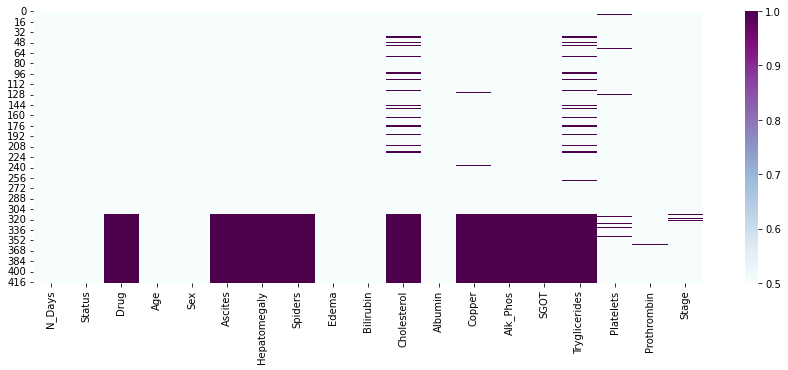

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),cmap='BuPu',vmin=0.5, vmax=1)

Percentage of missing values

In [ ]:
count = 0
len_df = 0
for col in df.columns:
    null = 0
    l = 0
    null = df[col].isnull().sum()
    l = len(df[col])
    count=count+ null
    len_df = len_df + l
print('Percentage of missing Values: ', np.ceil(100*count/len_df))

Percentage of missing Values:  14.0


Print columns based on missing values

In [ ]:
df_missing_values = pd.DataFrame({'percentage':round((df.isnull().mean())*100,4)})
df_missing_values.sort_values(by = 'percentage', ascending = False).style.background_gradient(cmap='summer')

,percentage
Tryglicerides,32.535900
Cholesterol,32.057400
Copper,25.837300
Drug,25.358900
Ascites,25.358900
Hepatomegaly,25.358900
Spiders,25.358900
SGOT,25.358900
Alk_Phos,25.358900
Platelets,2.631600


selecting categorical and numeric columns

In [ ]:
categorical= df.select_dtypes(["object"]).columns
categorical

Index(['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object')

In [ ]:
numerical= df.select_dtypes(["float64","int64"]).columns
numerical

Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

Handling the Missing Values

In [ ]:
#for categorical data, fill the missing value with mode
for j in categorical:
    df[j].fillna(df[j].mode().values[0], inplace=True)

In [ ]:
#for numerical data, fill the missing value with median
for j in numerical:
    df[j].fillna(df[j].median(), inplace=True)

In [ ]:
df.isnull().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

Counting disticnt categorical features.
Since stage is a multiclass feature, let us make it binary by making stages 0,1,2,3 as NO CIRRHOSIS i.e. 0 and stage 4 to 1 i.e. CIRRHOSIS

In [ ]:
df['Stage']=df['Stage'].replace([0,1,2,3],0)

In [ ]:
df['Stage']=df['Stage'].replace(4,1)

In [ ]:
df['Stage']=df['Stage'].astype("int64")

In [ ]:
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,58,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,1
1,4500,C,D-penicillamine,56,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,0
2,1012,D,D-penicillamine,70,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,1
3,1925,D,D-penicillamine,54,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,1
4,1504,CL,Placebo,38,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,0


## ML Model

Importing ML model modules

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

Selecting descriptive features and target features

In [ ]:
X=df.iloc[:,:-1].values
y=df.loc[:,'Stage'].values

Label Encoding the Categorical Data

In [ ]:
X

array([[400, 'D', 'D-penicillamine', ..., 172.0, 190.0, 12.2],
       [4500, 'C', 'D-penicillamine', ..., 88.0, 221.0, 10.6],
       [1012, 'D', 'D-penicillamine', ..., 55.0, 151.0, 12.0],
       ...,
       [1055, 'C', 'D-penicillamine', ..., 108.0, 143.0, 9.9],
       [691, 'C', 'D-penicillamine', ..., 108.0, 269.0, 10.4],
       [976, 'C', 'D-penicillamine', ..., 108.0, 350.0, 10.6]],
      dtype=object)

In [ ]:
le1 = LabelEncoder()
for i in [1,2,4,5,6,7,8]:
  X[:,i] = le1.fit_transform(X[:,i])

In [ ]:
df_X=pd.DataFrame(X)
df_X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,400,2,0,58,0,1,1,1,2,14.5,261.0,2.6,156.0,1718.0,137.95,172.0,190.0,12.2
1,4500,0,0,56,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6
2,1012,2,0,70,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.1,55.0,151.0,12.0
3,1925,2,0,54,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3
4,1504,1,1,38,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9


In [ ]:
df_y=pd.DataFrame(y)
df_y.head()

,0
0,1
1,0
2,1
3,1
4,0


Splitting The Dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]

In [ ]:
Dtc_model=DecisionTreeClassifier(max_depth=6)
Dtc_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

Predicting Values

In [ ]:
y_pred=Dtc_model.predict(X_test)

Decision Tree

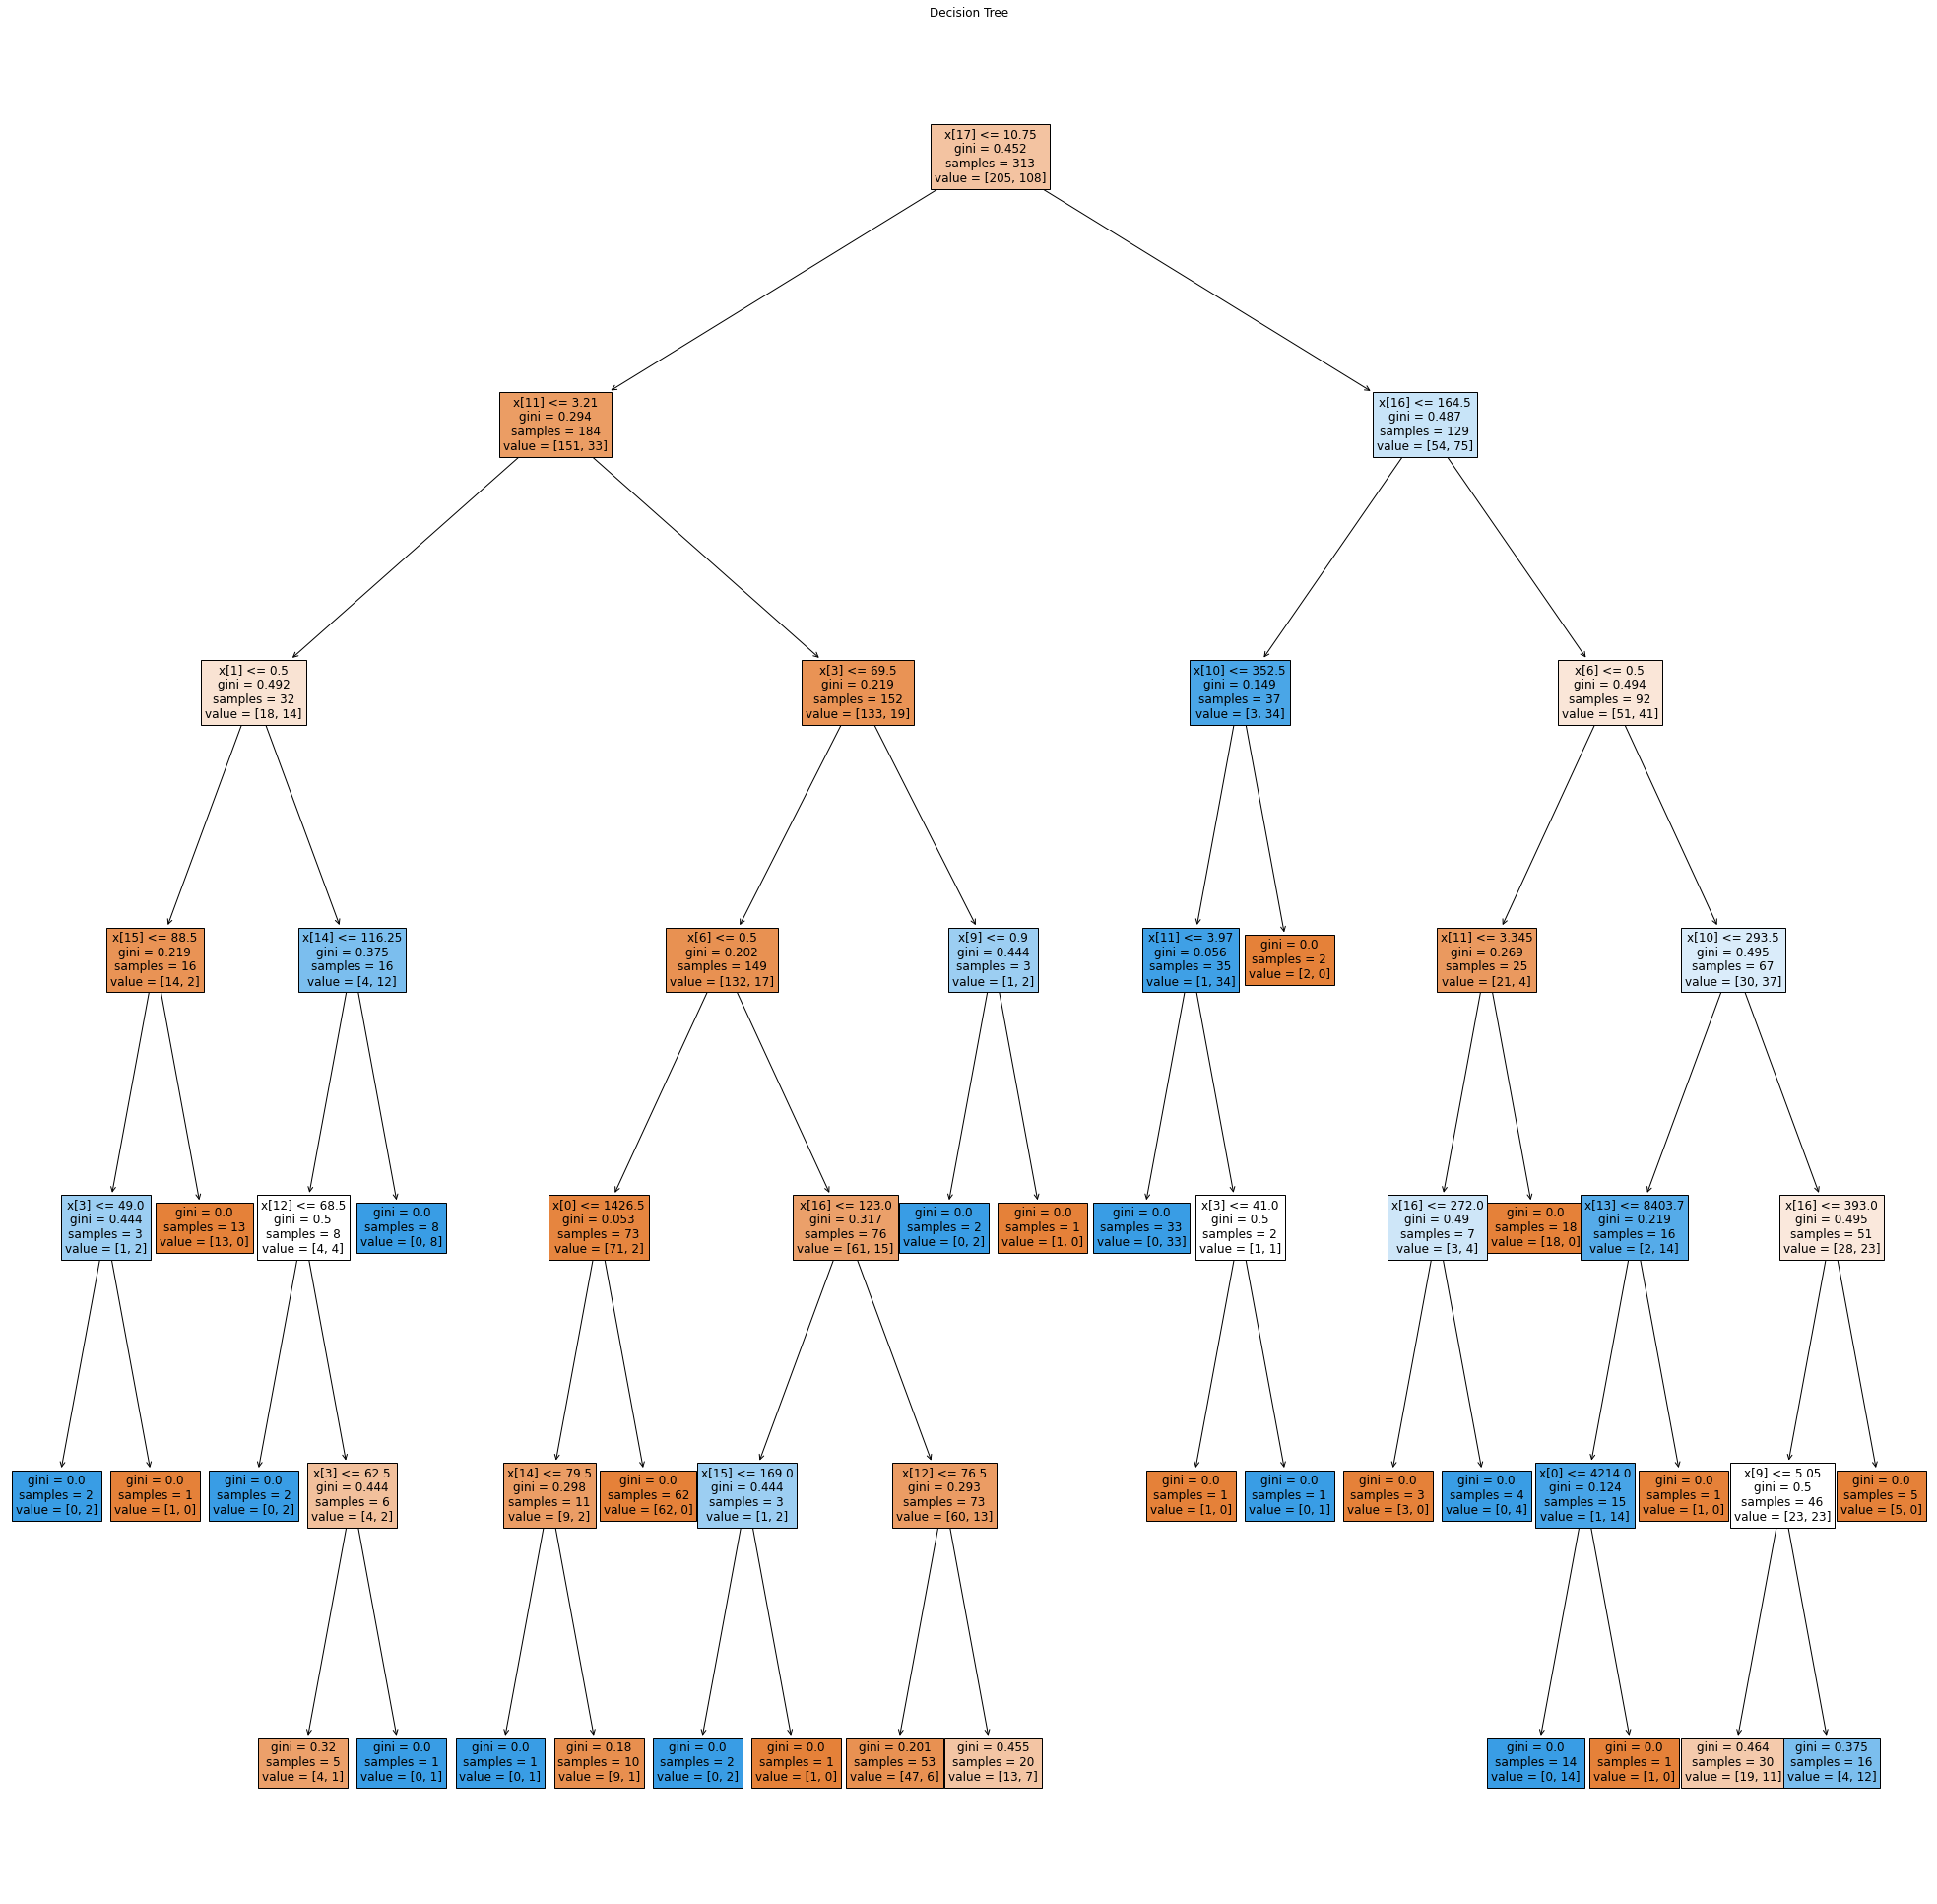

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(35,35))
plot_tree(Dtc_model,fontsize=12,filled=True)
plt.title("Decision Tree")
plt.show()

Learning Curve obtained from the Decision Tree model

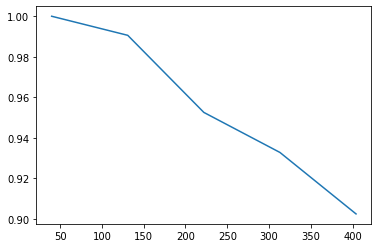

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(Dtc_model, X, y, cv=30,return_times=True)
plt.plot(train_sizes,np.mean(train_scores,axis=1))

## Evaluation Metrics

Accuracy score

In [ ]:
from sklearn.metrics import accuracy_score as ascore
print("Accuracy of Decision Tree Classifier is: ",ascore(y_test,y_pred)*100,"%")

Accuracy of Decision Tree Classifier is:  65.71428571428571 %


Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=Dtc_model.classes_)
cm

array([[56, 13],
       [23, 13]])

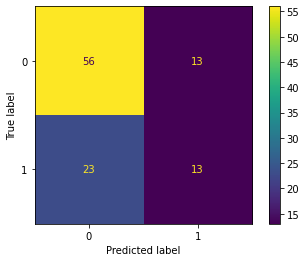

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=Dtc_model.classes_)
disp.plot()

Precission - Recall

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_pred,y_test)

In [ ]:
print("Precision: ",precision)
print("Recall: ",recall)
print("Thresholds: ",thresholds)

Precision:  [0.24761905 0.36111111 1.        ]
Recall:  [1.  0.5 0. ]
Thresholds:  [0 1]


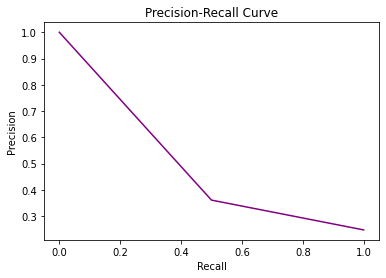

In [ ]:
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

AUC Curve

In [ ]:
from sklearn.metrics import roc_auc_score
print("ROC Accuracy score is: ",roc_auc_score(y, Dtc_model.predict_proba(X)[:, 1])*100,"%")

ROC Accuracy score is:  89.11065490673154 %


NameError: ignored